In [2]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import colors
import pandas as pd
from math import nan
import math
from glob import glob
import datetime as dt
import itertools

from CASutils import mapplot_utils as maps
from CASutils import filter_utils as filt 

from cmocean import cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns

import metpy.calc as mpcalc
from metpy.units import units
import metpy

%matplotlib inline
sns.set_style("whitegrid")

importlib.reload(maps)
importlib.reload(filt)

<module 'CASutils.filter_utils' from '/home/dhruv/CASanalysis/CASutils/filter_utils.py'>

In [ ]:
ps_files = ["/home/data/ERA5/PS_day/ps_{}.nc".format(i) for i in range(1979, 2020)]
ps = xr.open_mfdataset(ps_files)

In [3]:
t2m_files = ["/home/data/ERA5/day/T2m_day/t2m_{}.nc".format(i) for i in range(1979, 2020)]
t2m = xr.open_mfdataset(t2m_files).load()

In [5]:
t_files = glob('/home/dhruv/data/temp_ps/*/*.nc')
t = xr.open_mfdataset(t_files)

In [4]:
# t850 = t.sel(level=850).load()

u_files = glob('/home/data/ERA5/U_day/U_850mb/*.nc')
u = xr.open_mfdataset(u_files)

v_files = glob('/home/data/ERA5/V_day/V_850mb/*.nc')
v = xr.open_mfdataset(v_files)

In [ ]:
np.isnan(v.V).sum().compute().item()

In [6]:
def jja_std_anoms(data):
    data = data.sel(time=~((data.time.dt.month==2) & (data.time.dt.day == 29)))
    daystr = xr.DataArray(data.indexes['time'].strftime('%m-%d'), coords = data.time.coords, name="daystr")
    datseason = data.groupby(daystr).mean('time')
    harmonics = filt.calc_season_nharm(datseason, 4, dimtime=0)
    anoms = data.groupby(daystr)-harmonics
    jja_std = anoms.sel(time=anoms['time.season']=='JJA').std()
    std_anoms = anoms/jja_std
    return std_anoms

In [7]:
def remove_time_mean(x):
    return(x - x.mean(dim='time'))

def remove_annual_cycle(x):
#     return((x-x.groupby('time.month').mean()).drop('month'))
    return x.groupby('time.year').map(remove_time_mean)

In [8]:
wcr = xr.open_dataset("/home/dhruv/fluxnet/US-WCr.nc")
srm = xr.open_dataset("/home/dhruv/fluxnet/US-SRM.nc")
oas = xr.open_dataset("/home/dhruv/fluxnet/CA-Oas.nc")

In [ ]:
for day in t850.time.values:
    t850_i = t850.sel(time=day).T * units.K
    u_i = u.sel(time=day).U * units('m/s')
    v_i = v.sel(time=day).V * units('m/s')
    adv_i = mpcalc.advection(t850_i, u=u_i, v=v_i, dx=dx, dy=dy).metpy.convert_units(units('delta_degC/hour'))
    adv_i = adv_i.expand_dims('time')
    adv_i.to_netcdf('/home/dhruv/data/adv_files/adv_{}.nc'.format(day))

In [9]:
adv_files = glob("/home/dhruv/data/adv_files/*.nc")
adv = xr.open_mfdataset(adv_files)
adv

<xarray.Dataset>
Dimensions:                        (lat: 192, lon: 288, time: 15341)
Coordinates:
    level                          float64 850.0
  * time                           (time) datetime64[ns] 1979-01-01 ... 2020-...
  * lon                            (lon) float64 0.0 1.25 2.5 ... 357.5 358.8
  * lat                            (lat) float64 -90.0 -89.06 ... 89.06 90.0
Data variables:
    __xarray_dataarray_variable__  (time, lat, lon) float64 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


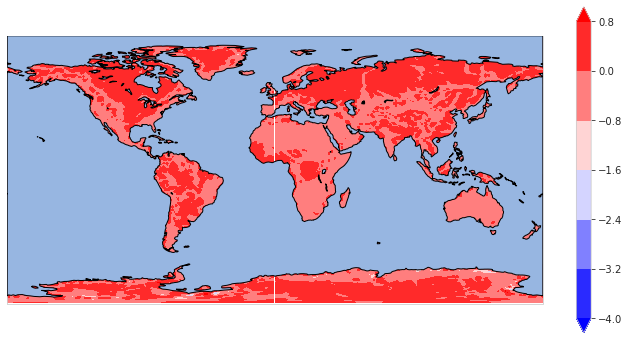

In [26]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
# ax.set_extent(extent, crs=ccrs.PlateCarree())

cf = plt.contourf(adv.lon, adv.lat, adv.__xarray_dataarray_variable__.mean('time'), cmap='bwr', extend='both')
plt.colorbar(cf)

ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cfeature.LAKES, edgecolor='black')
plt.show()

In [21]:
adv.__xarray_dataarray_variable__.mean().item()

-0.011602771470985273

In [26]:
adv = adv.__xarray_dataarray_variable__.fillna(adv.__xarray_dataarray_variable__.mean().item())

In [28]:
advection_anoms = remove_annual_cycle(jja_std_anoms(adv))
advection_anoms.to_netcdf("/home/dhruv/data/adv_anoms.nc")

numnans= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [34]:
advection_anoms

<xarray.DataArray (time: 15330, lat: 192, lon: 288)>
array([[[ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31],
        [ 1.51616616e-01,  1.70064111e-01,  1.83270301e-01, ...,
          1.08596597e-01,  1.23754502e-01,  1.41552159e-01],
        [ 1.48016693e-02,  4.20504623e-02,  6.91474271e-02, ...,
          1.34216574e-02, -3.22085463e-03, -5.50603626e-03],
        ...,
        [ 2.93081368e+00,  2.96866451e+00,  3.00692133e+00, ...,
          2.82978875e+00,  2.86203593e+00,  2.89573607e+00],
        [ 3.57370027e+00,  3.59377234e+00,  3.62134754e+00, ...,
          3.54188092e+00,  3.54674671e+00,  3.55877556e+00],
        [ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31]],

       [[ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31],
        [ 1.12813789e-01,  1.20748256e-01,  1.34218485e-01, ...,
          6.59469480e-02,  8.01385217e-02,  9.56432239e-02],
        [-4.61733272e-02, -6.48810161e-02, -7.39972767e-02, ...,
          6.19699979e-02,  2.82086835e-02, -7.80786720e-03],
...
        [ 8.68063085e-01,  8.91183398e-01,  9.02062955e-01, ...,
          6.82831407e-01,  7.50021826e-01,  8.15511577e-01],
        [ 8.56535993e-01,  8.62263151e-01,  8.71385028e-01, ...,
          8.39673001e-01,  8.44069190e-01,  8.49025219e-01],
        [ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31]],

       [[ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31],
        [-2.33104807e-01, -2.45514158e-01, -2.54762143e-01, ...,
         -1.97290549e-01, -2.10429302e-01, -2.22804631e-01],
        [-2.44876293e-01, -2.58388341e-01, -2.71798606e-01, ...,
         -2.09788485e-01, -2.20295805e-01, -2.32666555e-01],
        ...,
        [ 6.83595191e-01,  6.55106513e-01,  6.22137308e-01, ...,
          6.54822259e-01,  6.70620349e-01,  6.86339684e-01],
        [ 4.56986763e-01,  4.61475649e-01,  4.65717498e-01, ...,
          4.22095381e-01,  4.33283154e-01,  4.43125744e-01],
        [ 2.77333912e-31,  2.77333912e-31,  2.77333912e-31, ...,
          2.77333912e-31,  2.77333912e-31,  2.77333912e-31]]])
Coordinates:
    level    float64 850.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    daystr   (time) <U5 '01-01' '01-02' '01-03' ... '12-29' '12-30' '12-31'

In [38]:
advection_anoms.mean()

<xarray.DataArray ()>
array(2.03585145e-19)
Coordinates:
    level    float64 850.0

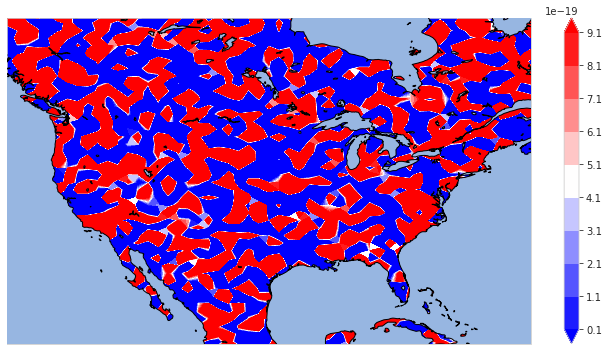

In [39]:
extent = [-130, -65, 20, 60.5]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())

cf = plt.contourf(adv.lon, adv.lat, advection_anoms.mean('time'), cmap='bwr', 
                  levels=np.arange(10**-20, 10**-18, 10**-19), extend='both')
plt.colorbar(cf)

ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cfeature.LAKES, edgecolor='black')
plt.show()

In [62]:
def plot_advection(lat, lon, where):
    if lon < 0:
        lon = lon + 360
        
    t2m_data = t2m.t2m.sel(dict(lat=lat, lon=lon), method='nearest')
    t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
    jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')

    heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values
    pre_hw_days = [day+pd.Timedelta(days=-5) for day in heatwave_days]
    
    extent = [-130, -65, 20, 60.5]

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    cs = plt.contour(gph.lon, gph.lat, gph.sel(time=heatwave_days).mean('time'), 
                     levels=np.arange(-80, 80, 5), colors='black', linewidths=1.5, linestyles='solid')
    plt.clabel(cs, fontsize=10, inline=True, fmt='%i', rightside_up=True, use_clabeltext=True)

    advection = adv.__xarray_dataarray_variable__.sel(time=heatwave_days).mean('time')
    cf = plt.contourf(adv.lon, adv.lat, advection, cmap='bwr', 
                      levels=np.arange(-0.2, 0.2, .01), extend='both')
    plt.colorbar(cf)
    
    plt.scatter(lon, lat, marker='*', s=100)

    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    plt.title('ERA5 temperature advection during heatwave days at {}: {}, {}'
             '\n Days selected from top 10% of heatwave anomalies'.format(where, lat, lon))

    plt.show()

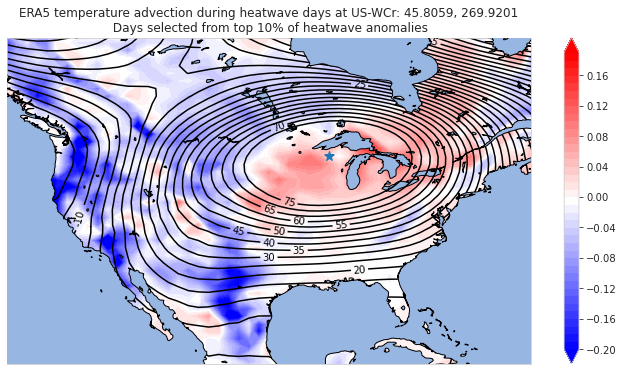

In [63]:
plot_advection(wcr.lat.item(), wcr.lon.item(), "US-WCr")

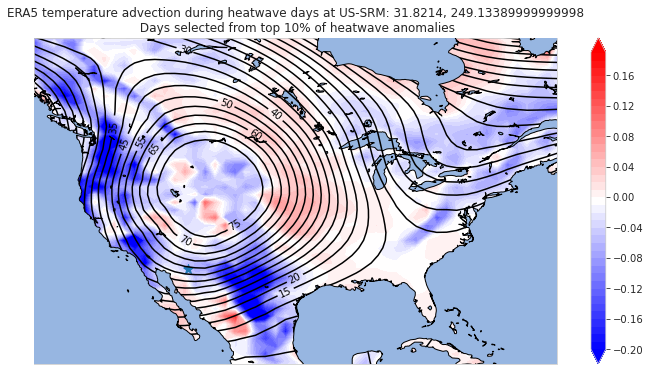

In [64]:
plot_advection(srm.lat.item(), srm.lon.item(), "US-SRM")

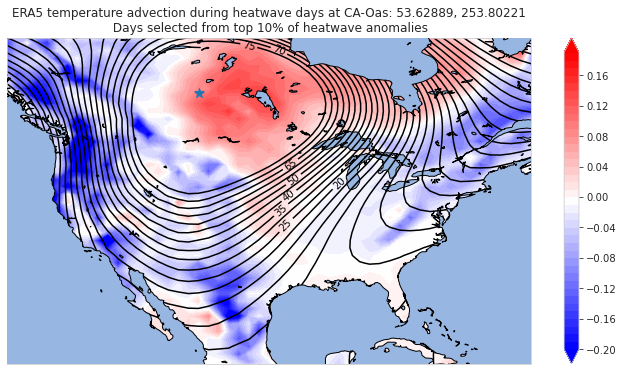

In [65]:
plot_advection(oas.lat.item(), oas.lon.item(), "CA-Oas")

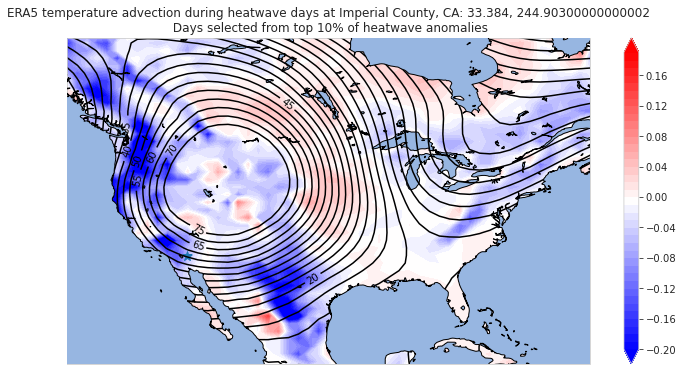

In [66]:
plot_advection(33.384, -115.097, "Imperial County, CA")

In [19]:
 def plot_pre_advection(lat, lon, where):
    if lon < 0:
        lon = lon + 360
        
    t2m_data = t2m.t2m.sel(dict(lat=lat, lon=lon), method='nearest')
    t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
    jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')

    heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values
    pre_hw_days = [day+pd.Timedelta(days=-3) for day in heatwave_days]
    
    extent = [-130, -65, 20, 60.5]

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    cs = plt.contour(gph.lon, gph.lat, gph.sel(time=pre_hw_days).mean('time'), 
                     levels=np.arange(-80, 80, 5), colors='black', linewidths=1.5, linestyles='solid')
    plt.clabel(cs, fontsize=10, inline=True, fmt='%i', rightside_up=True, use_clabeltext=True)

    advection = adv.__xarray_dataarray_variable__.sel(time=pre_hw_days).mean('time')
    cf = plt.contourf(adv.lon, adv.lat, advection, cmap='bwr', 
                      levels=np.arange(-0.2, 0.2, .01), extend='both')
    plt.colorbar(cf)
    
    plt.scatter(lon, lat, marker='*', s=100)

    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    plt.title('ERA5 temperature advection 3 days before heatwaves at {}: {}, {}'
             '\n Days selected from top 10% of heatwave anomalies'.format(where, lat, lon))

    plt.show()

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


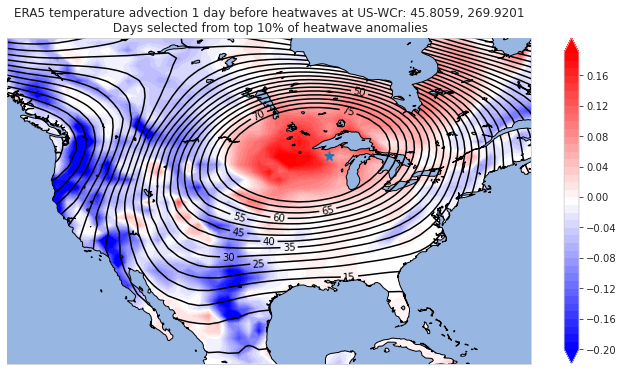

In [15]:
plot_pre_advection(wcr.lat.item(), wcr.lon.item(), "US-WCr")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


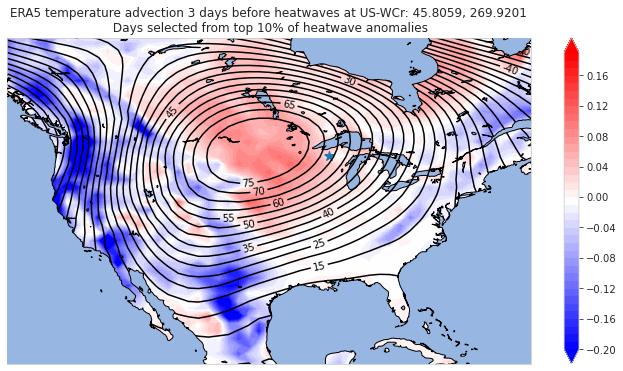

In [20]:
plot_pre_advection(wcr.lat.item(), wcr.lon.item(), "US-WCr")

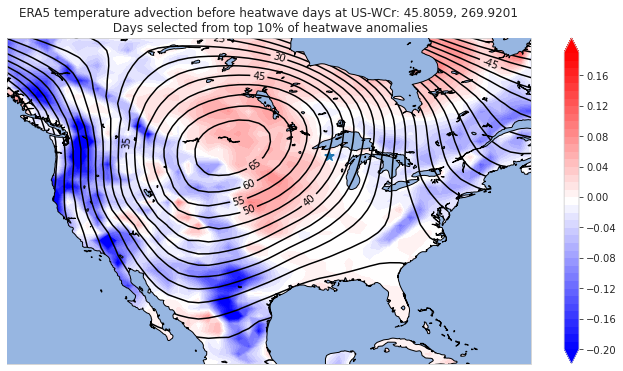

In [68]:
plot_pre_advection(wcr.lat.item(), wcr.lon.item(), "US-WCr")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


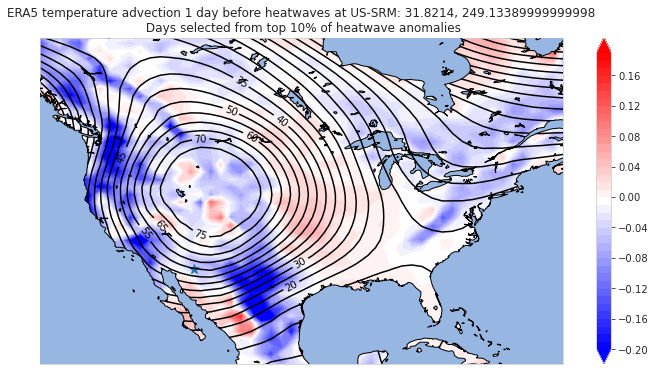

In [16]:
plot_pre_advection(srm.lat.item(), srm.lon.item(), "US-SRM")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


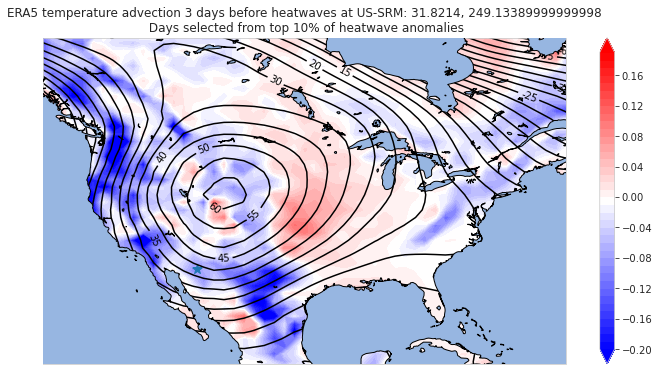

In [21]:
plot_pre_advection(srm.lat.item(), srm.lon.item(), "US-SRM")

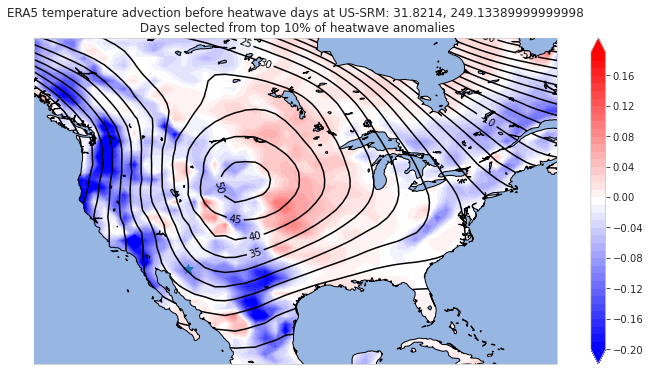

In [69]:
plot_pre_advection(srm.lat.item(), srm.lon.item(), "US-SRM")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


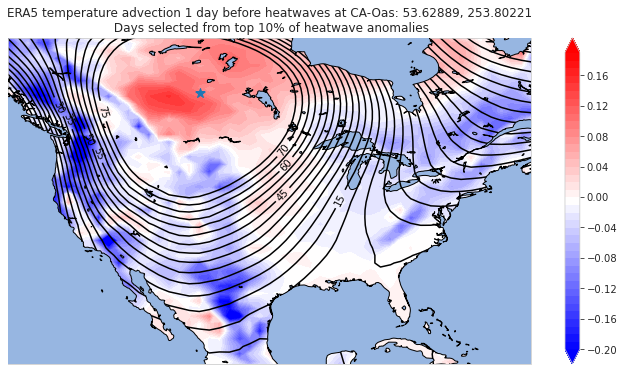

In [17]:
plot_pre_advection(oas.lat.item(), oas.lon.item(), "CA-Oas")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


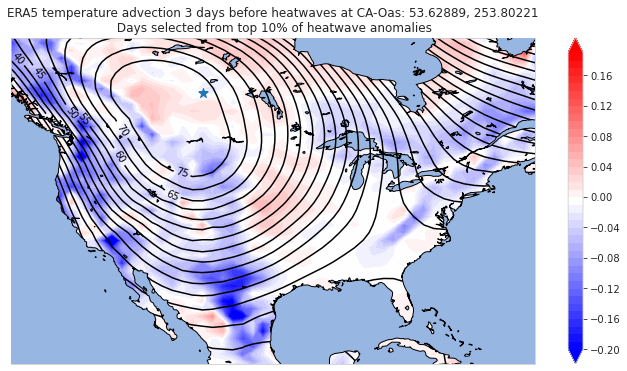

In [22]:
plot_pre_advection(oas.lat.item(), oas.lon.item(), "CA-Oas")

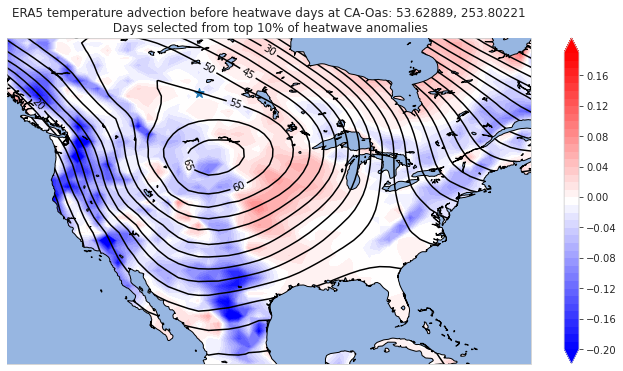

In [70]:
plot_pre_advection(oas.lat.item(), oas.lon.item(), "CA-Oas")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


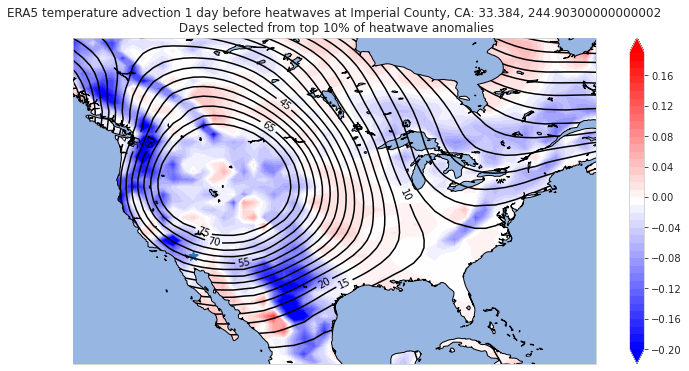

In [18]:
plot_pre_advection(33.384, -115.097, "Imperial County, CA")

/home/dhruv/my_venv/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


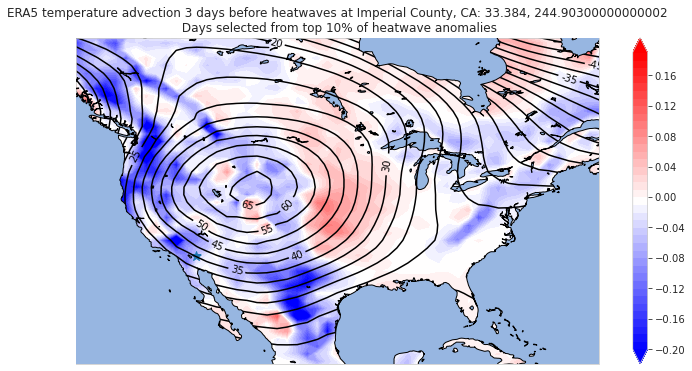

In [23]:
plot_pre_advection(33.384, -115.097, "Imperial County, CA")

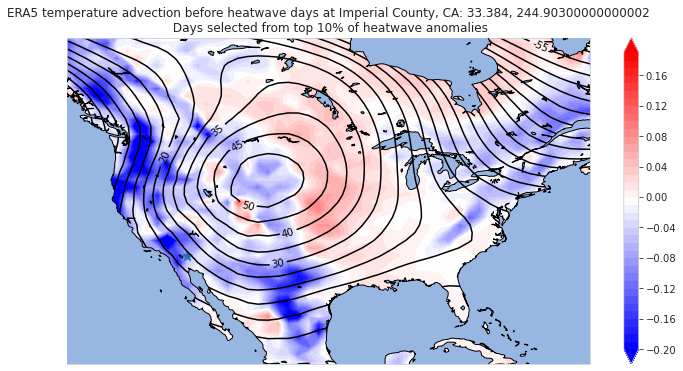

In [71]:
plot_pre_advection(33.384, -115.097, "Imperial County, CA")

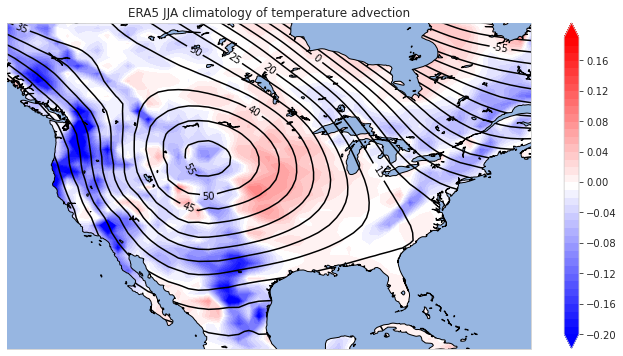

In [72]:
extent = [-130, -65, 20, 60.5]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())

cs = plt.contour(gph.lon, gph.lat, gph.sel(time=gph['time.season']=='JJA').mean('time'), 
                 levels=np.arange(-80, 80, 5), colors='black', linewidths=1.5, linestyles='solid')
plt.clabel(cs, fontsize=10, inline=True, fmt='%i', rightside_up=True, use_clabeltext=True)

advection = adv.__xarray_dataarray_variable__.sel(time=adv['time.season']=='JJA').mean('time')
cf = plt.contourf(adv.lon, adv.lat, advection, cmap='bwr', 
                  levels=np.arange(-0.2, 0.2, .01), extend='both')
plt.colorbar(cf)

ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cfeature.LAKES, edgecolor='black')
plt.title('ERA5 JJA climatology of temperature advection')

plt.show()

In [21]:
def plot_advection_anoms(lat, lon, where, levels=np.arange(-0.2, 0.2, .01)):
    if lon < 0:
        lon = lon + 360
        
    t2m_data = t2m.t2m.sel(dict(lat=lat, lon=lon), method='nearest')
    t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
    jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')

    heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values
#     pre_hw_days = [day+pd.Timedelta(days=-5) for day in heatwave_days]
    
    extent = [-130, -65, 20, 60.5]

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    gph_anoms = remove_annual_cycle(jja_std_anoms(gph)) # do i need to remove full cycle?
    cs = plt.contour(gph_anoms.lon, gph_anoms.lat, gph_anoms.sel(time=heatwave_days).mean('time'), 
                 levels=np.arange(-80, 80, 5), colors='black', linewidths=1.5, linestyles='solid')
    plt.clabel(cs, fontsize=10, inline=True, fmt='%i', rightside_up=True, use_clabeltext=True)
    
    advection_anoms = remove_annual_cycle(jja_std_anoms(adv.__xarray_dataarray_variable__))
    advection_anoms = advection_anoms.sel(time=heatwave_days).mean('time')
    cf = plt.contourf(adv.lon, adv.lat, advection_anoms, cmap='bwr', 
                      levels=np.arange(-0.2, 0.2, .01), extend='both')
    plt.colorbar(cf)
    
    plt.scatter(lon, lat, marker='*', s=100)

    ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
    ax.add_feature(cfeature.LAKES, edgecolor='black')
    plt.title('ERA5 temperature advection anomalies during heatwave days at {}: {}, {}'
             '\n Days selected from top 10% of heatwave anomalies'.format(where, lat, lon))

    plt.show()

numnans= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

numnans= [365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 

MemoryError: Unable to allocate 6.32 GiB for an array with shape (15330, 192, 288) and data type float64

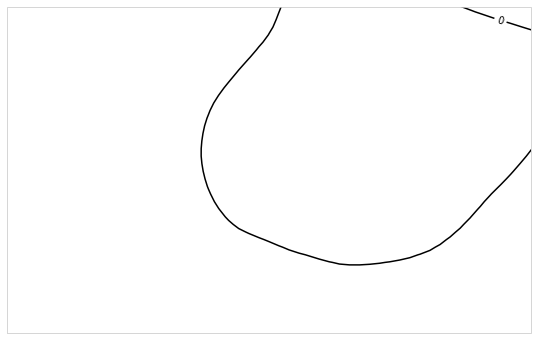

In [22]:
plot_advection_anoms(wcr.lat.item(), wcr.lon.item(), "US-WCr")

In [ ]:
plot_advection_anoms(srm.lat.item(), srm.lon.item(), "US-SRM")

In [ ]:
plot_advection_anoms(oas.lat.item(), oas.lon.item(), "CA-Oas")

In [ ]:
plot_advection_anoms(33.384, -115.097, "Imperial County, CA")

In [11]:
z_files = ["/home/data/ERA5/Z_day/Z_{}_500mb.nc".format(i) for i in range(1979, 2020)]
z = xr.open_mfdataset(z_files).load()

In [12]:
gph = z.Z/9.8

In [13]:
for lat in gph.lat.values:
    gph.loc[dict(lat=lat)] = gph.loc[dict(lat=lat)]-gph.sel(lat=lat).mean('lon')

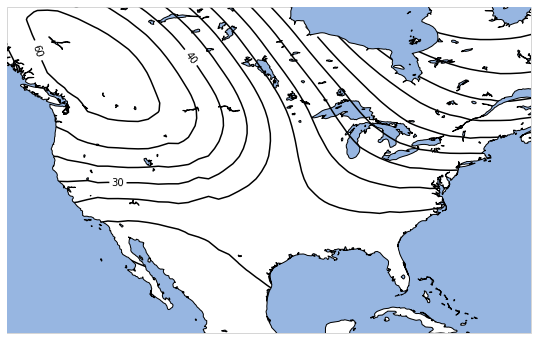

In [60]:
extent = [-130, -65, 20, 60.5]

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())

levels = np.arange(-80, 80, 10)
cs = plt.contour(gph.lon, gph.lat, gph.mean('time'), levels, colors='black', linewidths=1.5,
                linestyles='solid')
plt.clabel(cs, fontsize=10, inline=True, fmt='%i',
           rightside_up=True, use_clabeltext=True)

ax.add_feature(cfeature.OCEAN, zorder=100, edgecolor='k')
ax.add_feature(cfeature.LAKES, edgecolor='black')

plt.show()

In [52]:
gph

<xarray.DataArray 'Z' (time: 14975, lat: 192, lon: 288)>
array([[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.92501780e+00,  2.10912784e+00,  2.29964881e+00, ...,
          1.37661107e+00,  1.55703982e+00,  1.74133559e+00],
        [ 6.26308044e-01,  1.02155551e+00,  1.41946795e+00, ...,
         -5.37705612e-01, -1.52592105e-01,  2.34679251e-01],
        ...,
        [-2.80943117e+01, -2.94514153e+01, -3.08107185e+01, ...,
         -2.40275315e+01, -2.53830950e+01, -2.67385646e+01],
        [-1.45676480e+01, -1.52570787e+01, -1.59422480e+01, ...,
         -1.24719444e+01, -1.31774421e+01, -1.38727913e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-8.47896275e+00, -8.27461401e+00, -8.06207839e+00, ...,
         -9.05579300e+00, -8.87011779e+00, -8.67711759e+00],
        [-1.71449138e+01, -1.67222800e+01, -1.62869266e+01, ...,
         -1.83512893e+01, -1.79615679e+01, -1.75556523e+01],
...
        [ 2.59150828e+01,  2.64914331e+01,  2.70412882e+01, ...,
          2.39883779e+01,  2.46593564e+01,  2.53032219e+01],
        [ 1.13962243e+01,  1.17435859e+01,  1.20821136e+01, ...,
          1.03024410e+01,  1.06769406e+01,  1.10400331e+01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-9.09494702e-13,  0.00000000e+00, -9.09494702e-13, ...,
         -9.09494702e-13, -9.09494702e-13, -9.09494702e-13],
        [ 8.98847287e-01,  8.25440760e-01,  7.47584974e-01, ...,
          1.13308871e+00,  1.05532475e+00,  9.76089526e-01],
        [ 1.20115519e+00,  1.11092828e+00,  1.02824342e+00, ...,
          1.48319278e+00,  1.38563044e+00,  1.29129236e+00],
        ...,
        [ 6.87988500e+00,  7.70742023e+00,  8.50224339e+00, ...,
          4.19284288e+00,  5.12234589e+00,  6.01928917e+00],
        [ 1.28147551e+00,  1.69544658e+00,  2.10088850e+00, ...,
          6.84190843e-03,  4.39645105e-01,  8.64931310e-01],
        [ 9.09494702e-13,  9.09494702e-13,  9.09494702e-13, ...,
          9.09494702e-13,  9.09494702e-13,  9.09494702e-13]]])
Coordinates:
    level    float64 500.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-12-31
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0

In [27]:
def hw(lat, lon):    
    t2m_data = t2m.t2m.sel(dict(lat=lat, lon=lon), method='nearest')
    t2m_anoms = remove_annual_cycle(jja_std_anoms(t2m_data))
    jja_t2m_anoms = t2m_anoms.sel(time=t2m_anoms['time.season']=='JJA')

    heatwave_days = jja_t2m_anoms[jja_t2m_anoms>=jja_t2m_anoms.quantile(0.90)].time.values
    print(heatwave_days)

In [28]:
hw(wcr.lat.item(), wcr.lon.item())

['1979-07-26T00:00:00.000000000' '1980-06-03T00:00:00.000000000'
 '1980-06-04T00:00:00.000000000' '1980-08-02T00:00:00.000000000'
 '1980-08-14T00:00:00.000000000' '1981-06-01T00:00:00.000000000'
 '1981-06-14T00:00:00.000000000' '1981-06-15T00:00:00.000000000'
 '1981-07-30T00:00:00.000000000' '1981-08-04T00:00:00.000000000'
 '1981-08-05T00:00:00.000000000' '1981-08-15T00:00:00.000000000'
 '1982-06-09T00:00:00.000000000' '1982-07-02T00:00:00.000000000'
 '1982-07-06T00:00:00.000000000' '1982-07-07T00:00:00.000000000'
 '1982-07-08T00:00:00.000000000' '1983-06-03T00:00:00.000000000'
 '1983-06-04T00:00:00.000000000' '1983-06-05T00:00:00.000000000'
 '1983-06-06T00:00:00.000000000' '1983-06-07T00:00:00.000000000'
 '1983-06-08T00:00:00.000000000' '1983-07-09T00:00:00.000000000'
 '1983-07-10T00:00:00.000000000' '1983-07-11T00:00:00.000000000'
 '1983-07-12T00:00:00.000000000' '1983-07-13T00:00:00.000000000'
 '1983-07-14T00:00:00.000000000' '1983-07-21T00:00:00.000000000'
 '1983-07-29T00:00:00.000

In [29]:
hw(srm.lat.item(), srm.lon.item())

['1979-06-03T00:00:00.000000000' '1979-06-14T00:00:00.000000000'
 '1979-07-10T00:00:00.000000000' '1979-08-26T00:00:00.000000000'
 '1979-08-28T00:00:00.000000000' '1979-08-29T00:00:00.000000000'
 '1979-08-30T00:00:00.000000000' '1979-08-31T00:00:00.000000000'
 '1980-06-06T00:00:00.000000000' '1980-06-07T00:00:00.000000000'
 '1980-06-08T00:00:00.000000000' '1980-06-16T00:00:00.000000000'
 '1980-06-17T00:00:00.000000000' '1980-06-18T00:00:00.000000000'
 '1980-06-19T00:00:00.000000000' '1980-06-21T00:00:00.000000000'
 '1980-06-26T00:00:00.000000000' '1980-07-08T00:00:00.000000000'
 '1980-07-09T00:00:00.000000000' '1980-07-30T00:00:00.000000000'
 '1980-07-31T00:00:00.000000000' '1981-06-01T00:00:00.000000000'
 '1981-06-07T00:00:00.000000000' '1981-06-08T00:00:00.000000000'
 '1981-06-09T00:00:00.000000000' '1981-06-10T00:00:00.000000000'
 '1981-06-11T00:00:00.000000000' '1981-06-12T00:00:00.000000000'
 '1981-06-13T00:00:00.000000000' '1982-06-07T00:00:00.000000000'
 '1982-06-16T00:00:00.000